[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


🎬 Welcome to the Movie Assistant!
Enter a movie name: godfather

Movie Plot:
A 2012 Kannada film

Enter your review: good
Sentiment: POSITIVE (1.00)


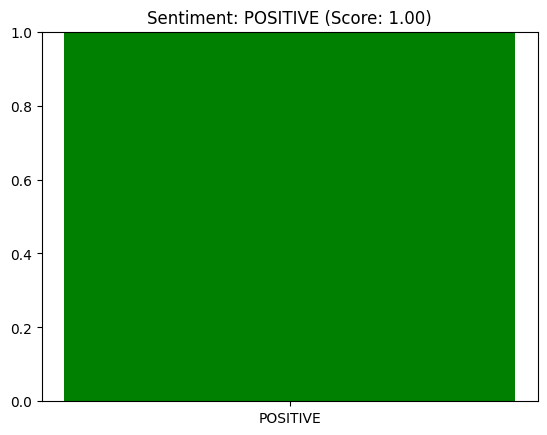

In [1]:
import requests
from transformers import pipeline
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Your TMDB API Key
TMDB_API_KEY = "c6eb16d5e85900a65b01f6d44cfe2a6c"

# Sentiment pipeline
sentiment_analyzer = pipeline("sentiment-analysis")


def preprocess_text(text):
    return ' '.join([word.lower() for word in text.split() if word.lower() not in stop_words])


# Fetch Movie Plot from TMDB
def get_movie_plot(movie_name):
    search_url = f"https://api.themoviedb.org/3/search/movie?api_key={TMDB_API_KEY}&query={movie_name}"
    r = requests.get(search_url).json()

    if not r["results"]:
        return "Error: Movie not found."

    movie_id = r["results"][0]["id"]

    details_url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={TMDB_API_KEY}"
    details = requests.get(details_url).json()

    return details.get("overview", "Plot not available.")


# Sentiment classification
def get_sentiment(review):
    sentiment = sentiment_analyzer(review)[0]
    return sentiment["label"], sentiment["score"]


# Plot sentiment result
def plot_sentiment(label, score):
    colors = {"POSITIVE": "green", "NEGATIVE": "red", "NEUTRAL": "gray"}
    height = score if label == "POSITIVE" else (1-score if label == "NEGATIVE" else 0.5)
    plt.bar(label, height, color=colors.get(label, "gray"))
    plt.title(f"Sentiment: {label} (Score: {score:.2f})")
    plt.ylim(0, 1)
    plt.show()


# Movie Assistant
def movie_assistant():
    print("🎬 Welcome to the Movie Assistant!")

    movie_name = input("Enter a movie name: ").strip()
    plot = get_movie_plot(movie_name)

    if "Error" in plot:
        print(plot)
        return

    print("\nMovie Plot:")
    print(plot)

    review = input("\nEnter your review: ")
    label, score = get_sentiment(review)
    print(f"Sentiment: {label} ({score:.2f})")
    plot_sentiment(label, score)


# Run
movie_assistant()